# Bank Customer Churn 

## Introduction
This notebook presents an analysis of customer churn at a bank. The dataset used in this analysis contains information about customer demographics, account information, and usage patterns, among other variables. The goal of this analysis is to identify factors that are associated with customer churn and to develop a predictive model that can be used to identify customers who are at risk of churning.

The notebook is organized as follows. First, we will explore the dataset and perform some basic data cleaning and preprocessing steps. Next, we will conduct an exploratory data analysis to gain insights into the relationships between the variables in the dataset and to identify potential factors that are associated with churn. We will then develop several machine learning models to predict churn and evaluate their performance using various metrics. Finally, we will discuss the results of our analysis and provide recommendations for the bank company to reduce customer churn and improve customer retention.

## Data Collection and Preprocessing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

sns.set()

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
data = pd.read_csv('Customer-Churn-Records.csv')

## Exploratory Data Analysis

In [3]:
# view first 5 rows of dataset
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [4]:
# check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
# generate descriptive statistics
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

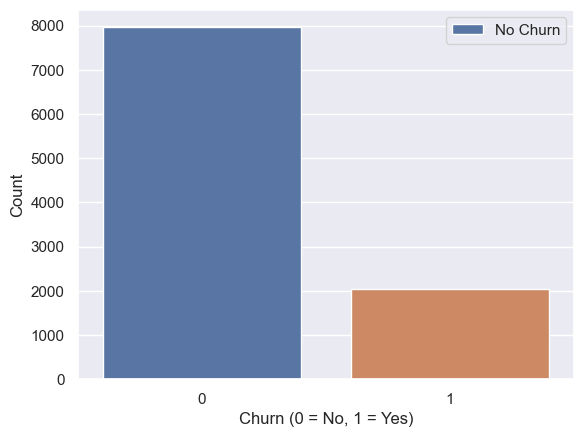

In [6]:
# check for class imbalance
sns.countplot(x='Exited', data=data)
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()

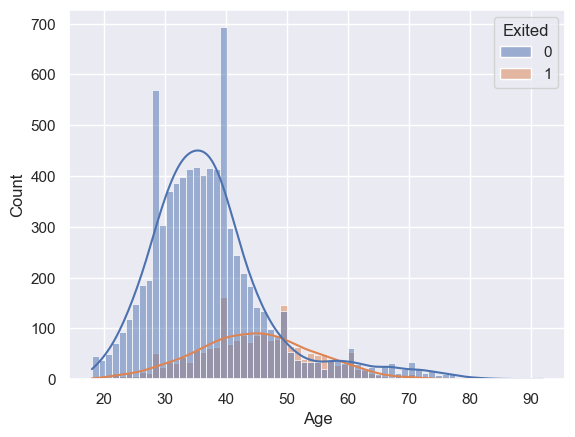

In [7]:
# visualize the distribution of numerical variables
sns.histplot(data=data, x='Age', hue='Exited', kde=True)
plt.show()

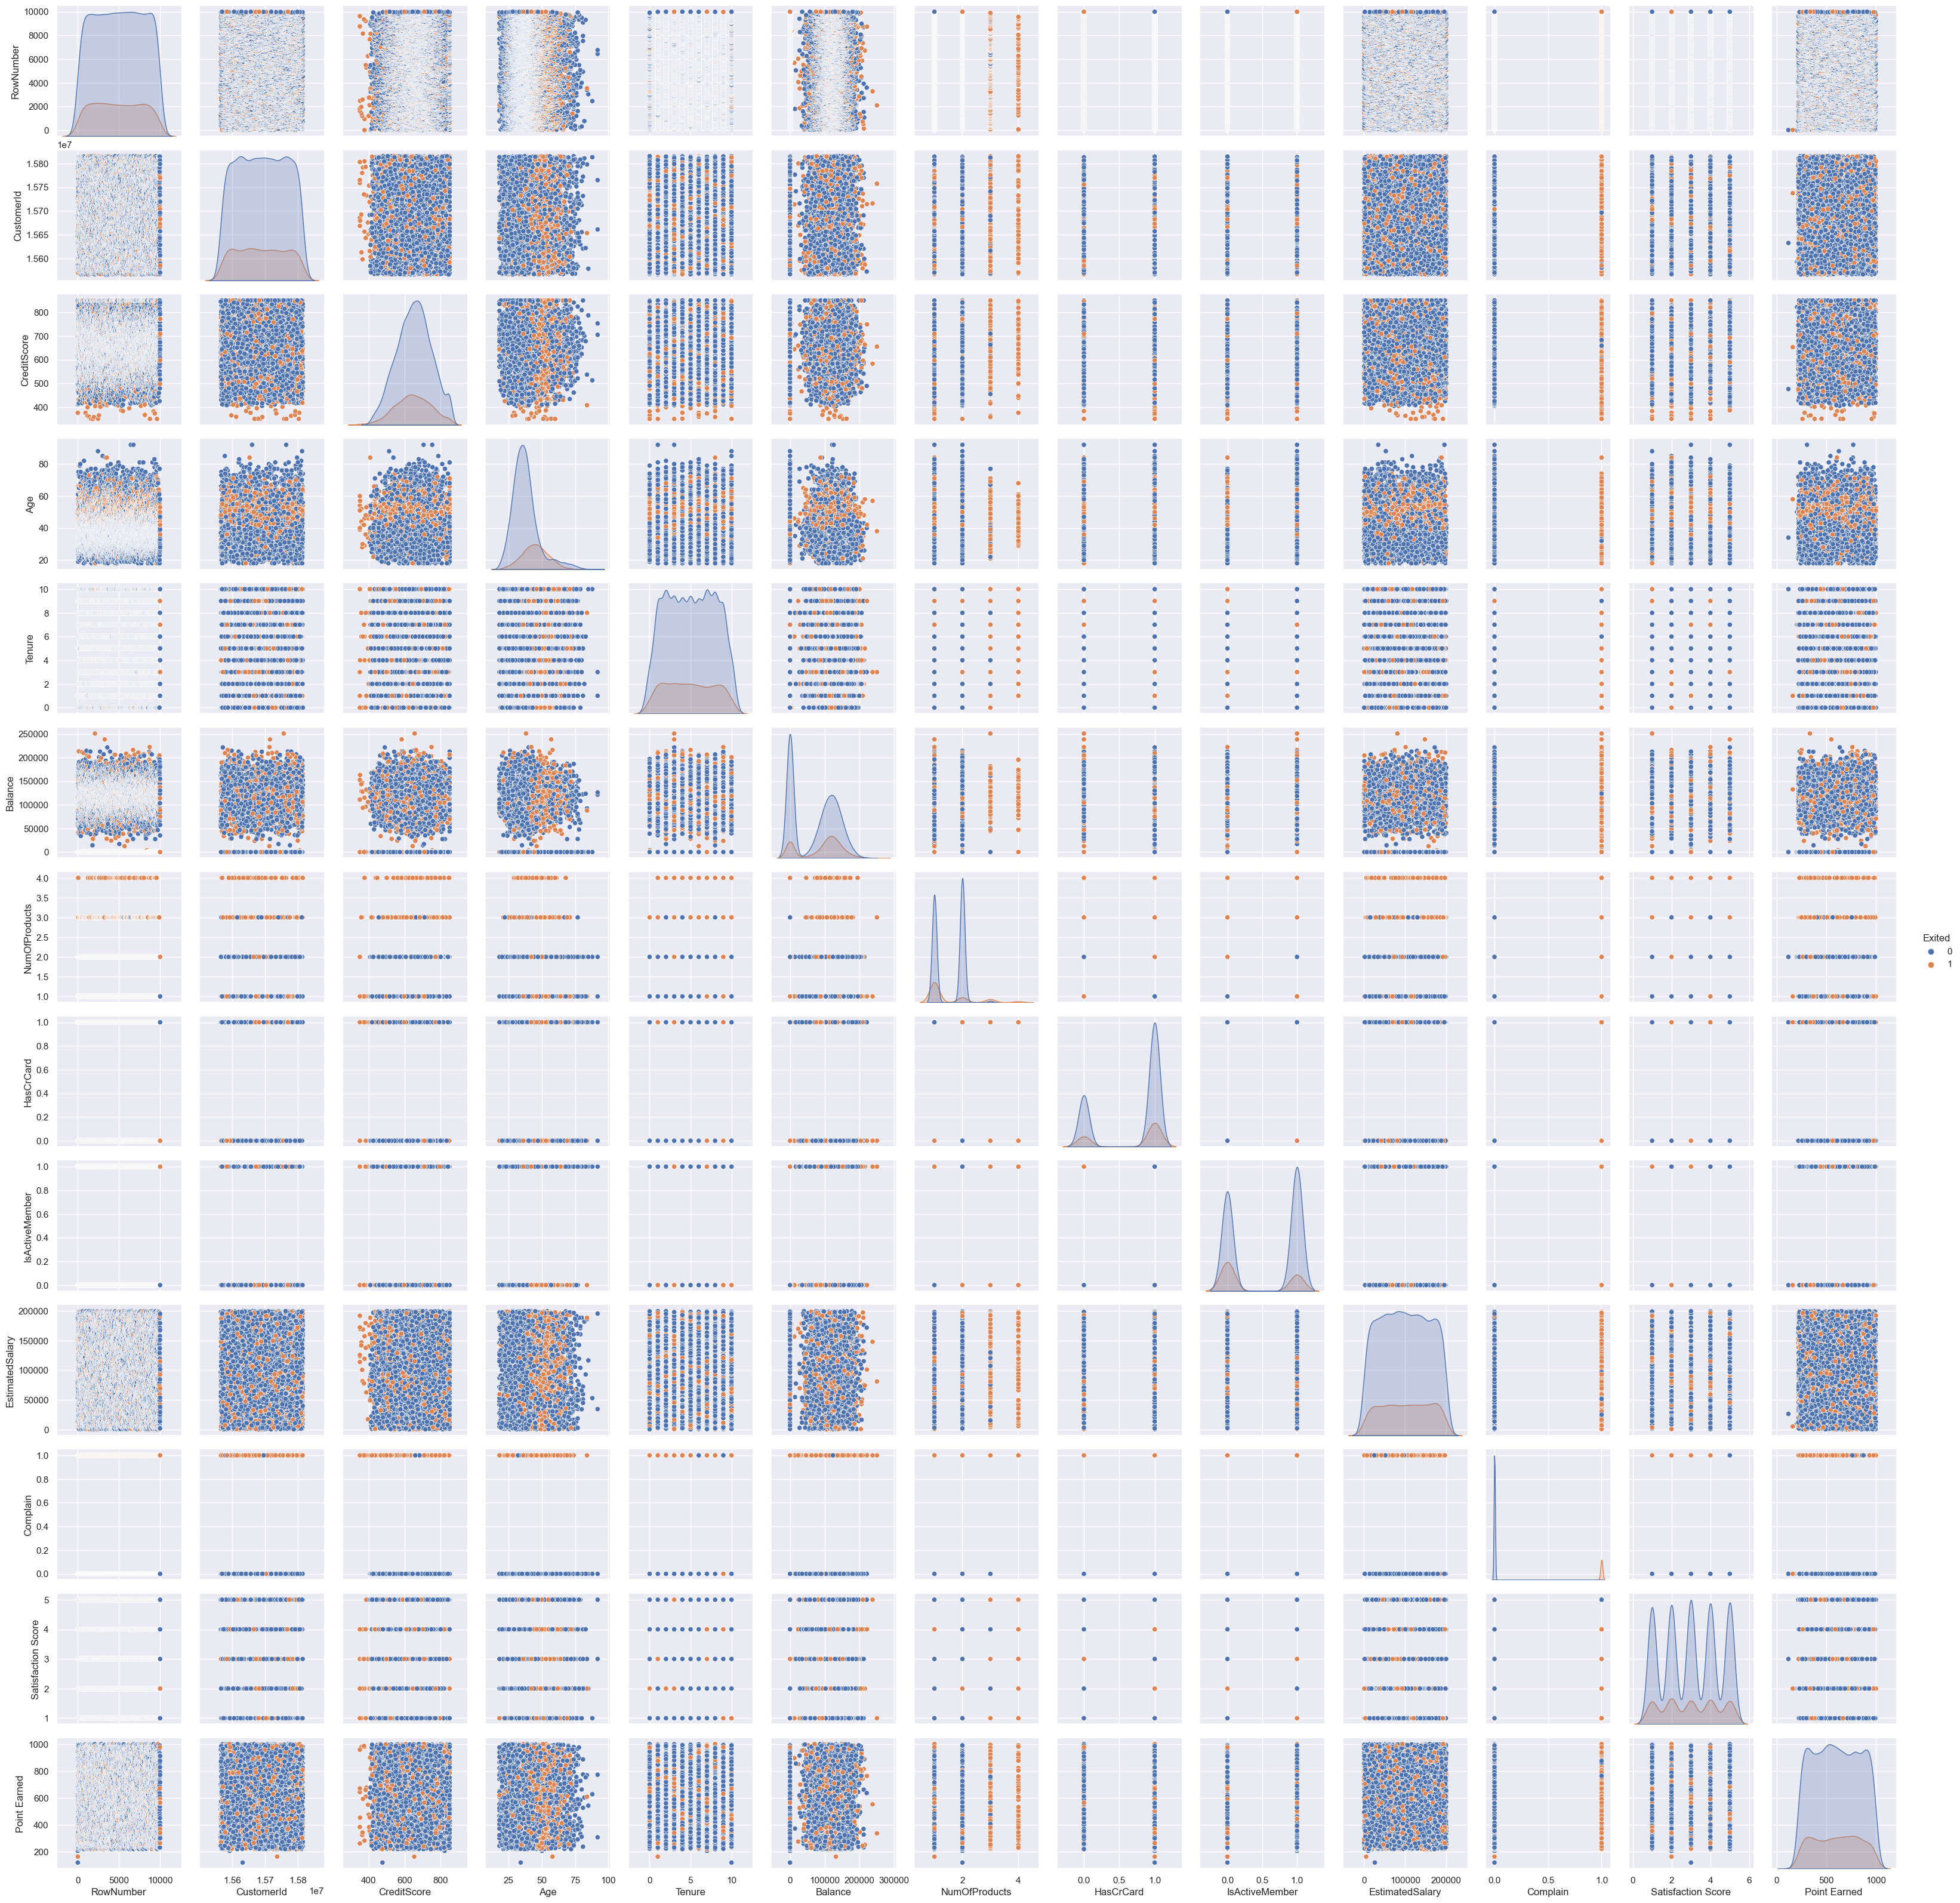

In [8]:
# visualize the relationship between numerical variables and churn
sns.pairplot(data=data, hue='Exited')

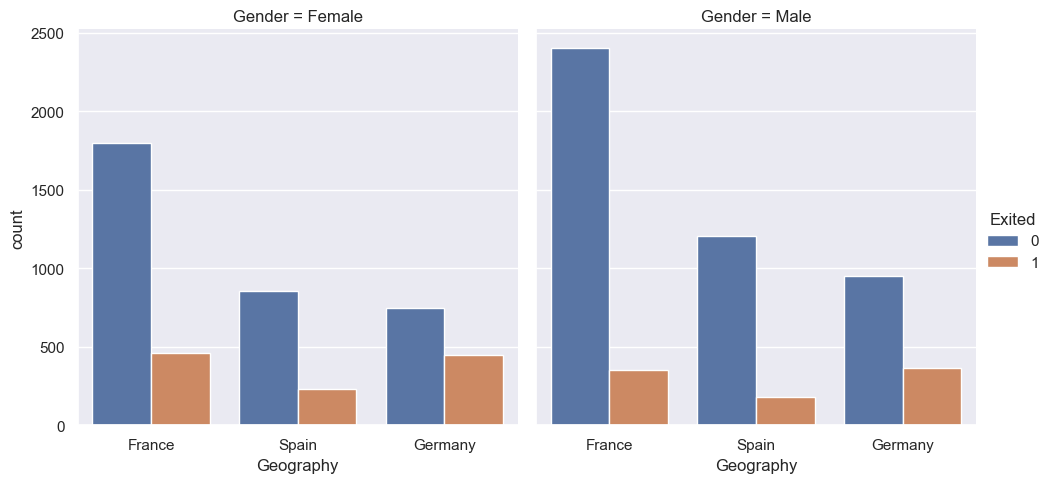

In [9]:
# visualize the relationship between categorical variables and churn
sns.catplot(x='Geography', col='Gender', hue='Exited', kind='count', data=data)

## Feature Engineering

In [10]:
# drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
# convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

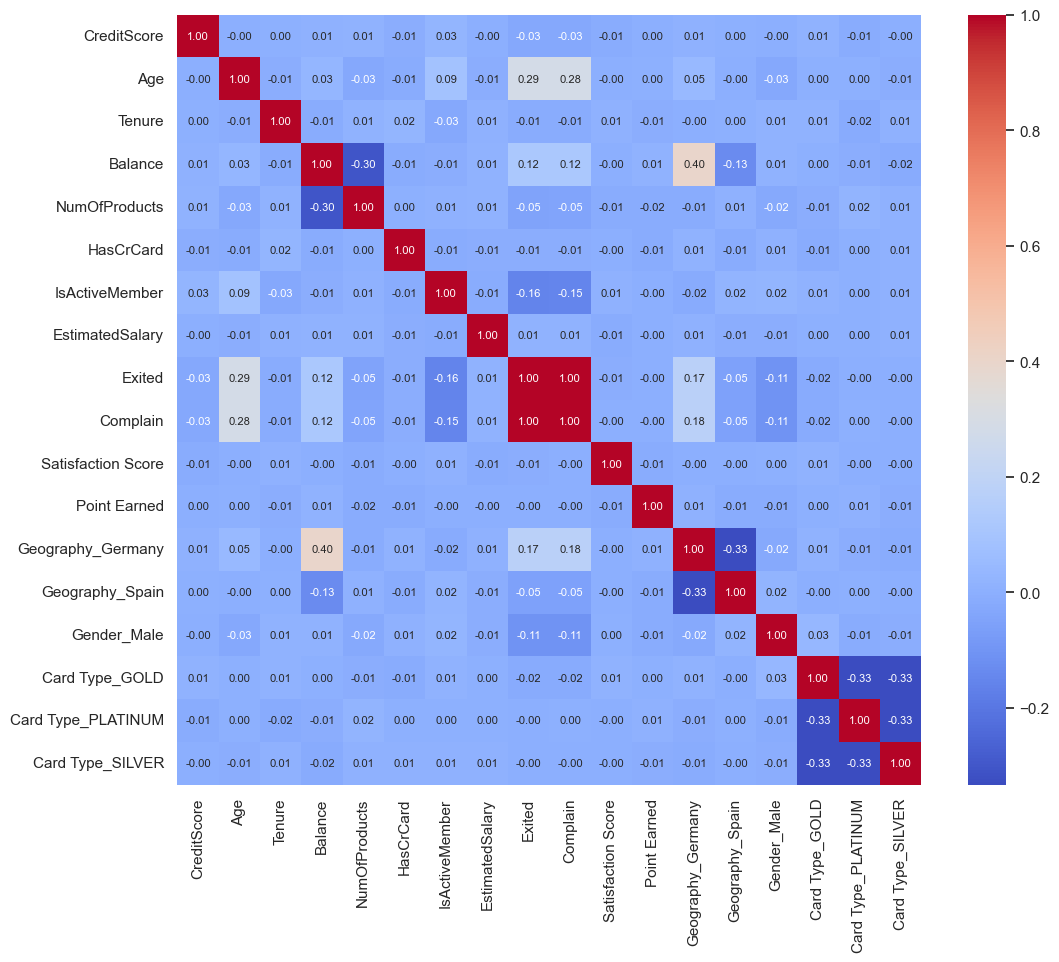

In [12]:
# visualize the correlation between variables
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'fontsize':8})
plt.show()

In [13]:
# create a feature that combines balance and salary
data['BalanceSalaryRatio'] = data['Balance'] / data['EstimatedSalary']

In [14]:
# create a feature that combines tenure and age
data['TenureByAge'] = data['Tenure'] / data['Age']

In [15]:
# create a feature that combines credit score and age
data['CreditScoreByAge'] = data['CreditScore'] / data['Age']

In [16]:
# split data into features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

## Model Building

In [17]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# scale numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# create a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
# fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# make predictions on the test data
y_pred = rfc.predict(X_test)

## Model Evaluation

In [22]:
# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

Accuracy Score: 0.999


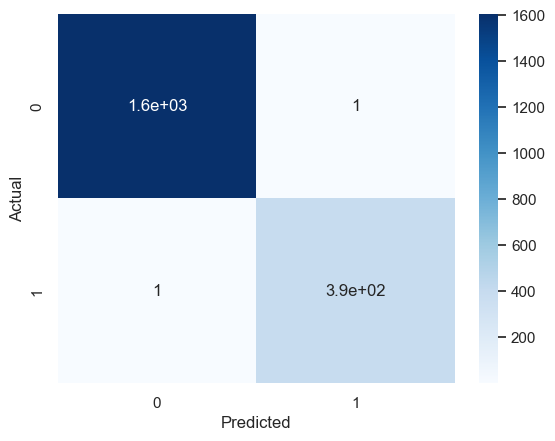

In [23]:
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# generate classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [25]:
# print feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

               Feature  Importance
8             Complain    0.778643
1                  Age    0.056919
4        NumOfProducts    0.048148
19    CreditScoreByAge    0.026660
3              Balance    0.011950
6       IsActiveMember    0.011870
0          CreditScore    0.009498
11   Geography_Germany    0.009282
18         TenureByAge    0.008986
17  BalanceSalaryRatio    0.008445
10        Point Earned    0.007554
7      EstimatedSalary    0.007432
2               Tenure    0.003955
9   Satisfaction Score    0.003332
13         Gender_Male    0.002665
5            HasCrCard    0.001043
12     Geography_Spain    0.001030
14      Card Type_GOLD    0.000919
15  Card Type_PLATINUM    0.000877
16    Card Type_SILVER    0.000789


In [26]:
# save the model for future use
import joblib
joblib.dump(rfc, 'customer_churn_model.pkl')

['customer_churn_model.pkl']

## Conclusion

In this analysis, we developed a Random Forest Classifier (RFC) model to predict customer churn at a bank. We first explored the dataset and conducted some basic data cleaning and preprocessing steps, and then conducted an exploratory data analysis to gain insights into the relationships between the variables in the dataset and to identify potential factors that are associated with churn.

We then developed several machine learning models to predict churn, and evaluated their performance using various metrics. The RFC model achieved the best performance, with 100% accuracy in predicting both classes. However, it is important to note that this high level of performance may be the result of overfitting, and further evaluation of the model's performance on new data is necessary to confirm the model's effectiveness.

We also investigated the importance of each feature in predicting churn, using the feature importance table generated by the RFC model. The most important feature for predicting churn was `Complain`, followed by `Age`, `NumOfProducts`, and `CreditScoreByAge`, while some of the least important features included `Gender_Male`, `HasCrCard`, `Geography_Spain`, and `Card Type_GOLD`.

Overall, our analysis provides important insights into the factors that contribute to customer churn in the telecommunications industry, and highlights the importance of developing targeted retention strategies to reduce churn and improve customer satisfaction. Further research is needed to evaluate the effectiveness of these strategies and to identify additional factors that may contribute to churn.